

# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will be analyzing the data associated with 100k medical appointments in Brazil and is focused on ascertaining why only 30% of patients did not show up for their medical appointment. To tackle this question/problem, i will analyse the factors that could determine the likelihood of a patient showing up or not. This will be done using 5 questions which will be asked in the course of the project. Three independent variables will be analysed alongside one dependent variable. My dependent variable 'no_show' or 'show' says returns No if the patients showed up for their appointment and Yes if they did not show up.

In [102]:
# this cell imports all the relevant packages that will be used in this project
# numpy, pandas, matplotlib and seaborn and the magic inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [103]:
# this cell loads the database file for no show appointments 

noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

In this section, in a bid to understand the structure of the data and fix it, i will assess and inspect the data to identify problems with it that need to be fixed...problems such as incorrect datatypes, missing data, duplicate rows, mismatch number or records,structural problems etc. Adequate cleaning of the data will be performed where necessary as soon as assessing is done
### Overview of General Properties of the Data 
### Data Assessing and Inspection 

In [104]:
# this returns the first few lines in the dataframe
# by default, it returns the first five entries, that is, 0 to 4
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From this output, it can be observed that some of the column names are either misspelt, or not named correctly (Hipertension, No-show,Handcap). This will be cleaned in the data cleaning section.

In [105]:
# this cell returns a tuple of the dimensions of the dataframe
noshow_df.shape

(110527, 14)

There are 110527 records representing appointments and 14 columns

In [106]:
# this displays a concise summary of the dataframe..
# ..including the datatypes and number of non-null values in each column
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values. Every column has 110527 rows which is the total number of samples There are also 9 numeric columns - 8 columns of type integer and 1 column of type float; The remaining 5 columns are of type string indicated by object in python

In [107]:
# this returns the number of duplicate rows in the dataset
sum(noshow_df.duplicated())

0

There are no duplicate rows. Every row is unique

In [108]:
# This checks for the number of missing values in the columns
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
Clearly, there are no missing values

In [109]:
# this returns the number of non-null unique values in the dataset
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [110]:
# This returns the unique values for every column in the dataset
for col in noshow_df:
    print("Unique Values for {} : {} ".format(col,noshow_df[col].unique()))
    print('\n')

Unique Values for PatientId : [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 


Unique Values for AppointmentID : [5642903 5642503 5642549 ... 5630692 5630323 5629448] 


Unique Values for Gender : ['F' 'M'] 


Unique Values for ScheduledDay : ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 


Unique Values for AppointmentDay : ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-

In [111]:
# this returns useful descriptive statistics for each numeric column of data
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This implies the descriptive statistics for all columns of numeric type. Note that Gender, ScheduledDay, AppointmentDay and No-show columns where not returned for this operation because they are of type string which requires a different kind of operations to be performed on them. We will obtain their descriptive statistics in the next code. Looking through the Age column, we observe the following- The mean age of patients is 37. The minimum age is -1, age cannot be a negative number; In a later code, we will identify which row index has this value in the next cell and the row will be dropped during our data cleaning section The max age is seen to 115, implying that the appointment consists of little children as young as 1 year and older people as old as 115 years. The minimum and maximum values for scholarship is 0 and 1 respectively implying 0 for no access to scholarship and 1 for access to scholarship

In [112]:
# this returns descriptive statistics for columns whose values are non-numeric/strings(objects)
#  which could not be returned in the previous code
noshow_df.describe(include = ['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


> This returns the descriptive statistics for all columns of non-numeric type/strings. Gender has 2 unique rows and has more appointments with Females(F) than Males(M) with a frequency of 71840. ScheduledDay has 103549 unique rows and 2016-05-06 is the day with the highest number of occuring appointments with a frequency of 24. No-show has 2 unique rows...Yes and No; with No occuring more with a frequency of 88208

In [113]:
# filtering to identify the row label for age that contains -1 so we can drop it during cleaning section because age cannot be a negative number
noshow_df[noshow_df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The row label for -1 is 99832. This information will be used to drop the specific row

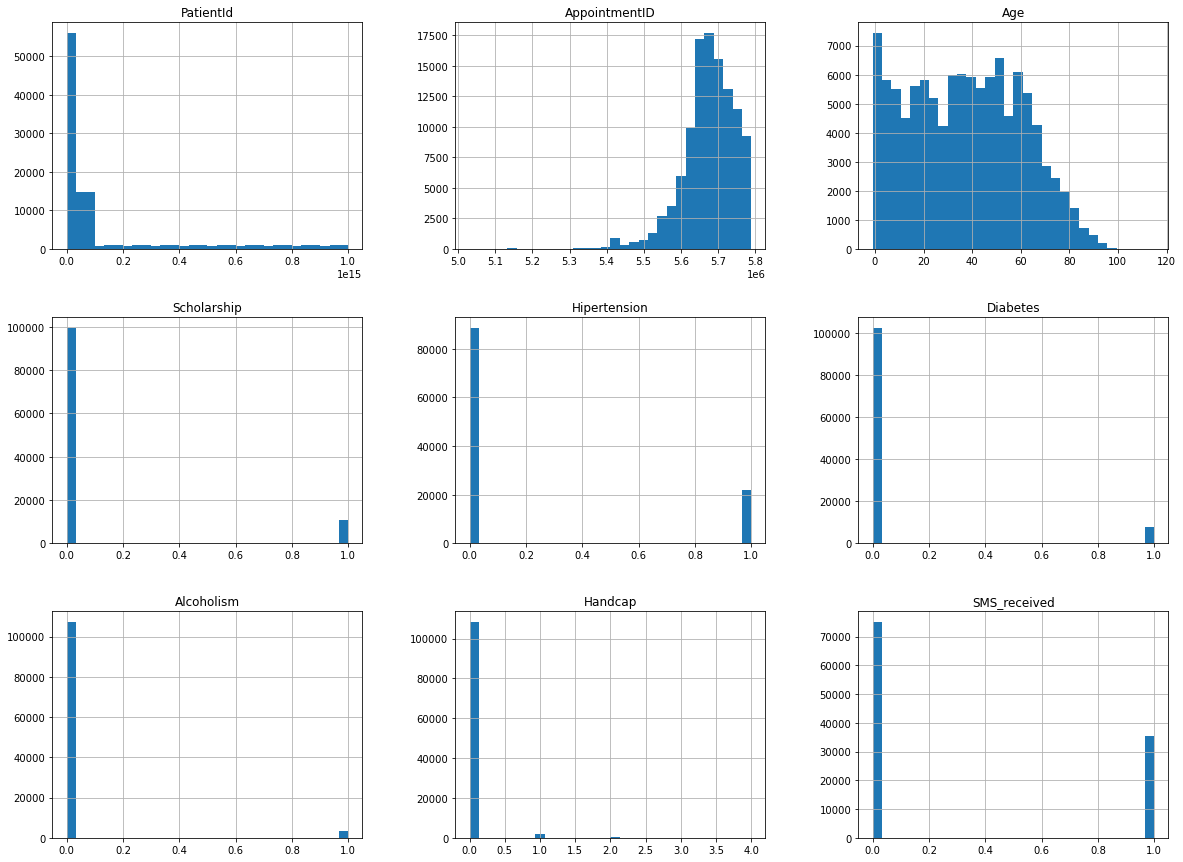

In [114]:
# We plot the distribution of each variable in the dataset

noshow_df.hist(bins=30, figsize =(20,15));


> Based on the plots above which shows the distribution for each of the variables of numeric type using a histogram,

> PatientId,Scholarship,Age, sms_received,Alcoholish, etc are all right skewed
AppointmentID is left skewed


### Data Cleaning

Having identified the inconsistencies in the data such as incorrect column names, irrelevant columns inconsistent row indexes etc. we will begin cleaning the data by renaming the incorrect columns, dropping the irrelevant columns and the inconsistent values and so on.

In [115]:
# Renaming column names: Hipertension to Hypertension..
# Handcap to Handicap & No-show to No_show
noshow_df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap','No-show':'No_show'}, inplace=True)
#Confirm changes
noshow_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [116]:
# Renaming column names to lowercase for ease of rememberance and to be easier to work with in python
noshow_df.rename(columns=str.lower, inplace=True)
noshow_df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Column names have been renamed

In [117]:
# We drop the index value of -1 for Age
noshow_df.drop(index = 99832, inplace=True)
noshow_df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


row index for -1 has been dropped and minimum age is now 0

In [118]:
# We drop columns we won't be needing..
# Patientid, AppointmentID,ScheduledDay and AppointmentDay
#These are not relevant to our questions
noshow_df.drop(['patientid','appointmentid','scheduledday','appointmentday'], axis = 1, inplace=True)

In [119]:
# Confirm changes
noshow_df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


patientid, appointmentID,scheduledday and appointmentday Columns have been dropped

# Exploratory Data Analysis for No_show_appointment Dataset
> After a successful assessing and cleaning of this data, i will explore this cleaned quality data by computing relevant statistics and creating adequate visualizations that will be focused on addressing the following questions we will be asking.
> Dependent Variable is no_show 

> Independent Variable are Age, Gender and Scholarship.

> In this section, we will be exploring the associations between these variables using the following research questions.

> RQ1. Is a particular gender more likely to show up for their appointment than the other?

> RQ2. Is patient access to Scholarship associated with their no show or show up for their appointment

> RQ3. Is a particular Age group more likely to show up for an appointment than the others?

> RQ4. Is there a relationship between the Age and the Scholarship of patients as determinants of show or no show?

> RQ5. Is there a relationship between Scholarship and Gender as factors influencing show or no show?

In [120]:
# First We create marks for patients who didn't show up(no_show) and for those who did show up(show)
no_show=noshow_df.no_show=='Yes'
show=noshow_df.no_show=='No'

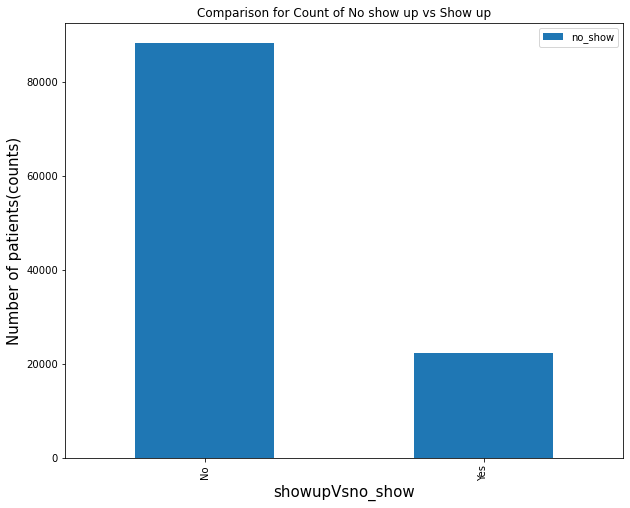

In [185]:
# this plots a count on the patients that showed up and did not show up
# this defines and calls the function 'appointment'
def appointment(noshow_df,showupVsno_show,no_show,show):

    noshow_df.no_show.value_counts().plot.bar(figsize=(10,8), title='Distribution of No show up vs Show up')
    plt.legend(fontsize=10);
    plt.xlabel('showupVsno_show',fontsize=15)
    plt.ylabel('Number of patients(counts)', fontsize=15);
appointment(noshow_df,'showupVsno_show',no_show,show)

In [196]:
noshow_df.no_show[no_show].describe()

count     22319
unique        1
top         Yes
freq      22319
Name: no_show, dtype: object

In [197]:
noshow_df.no_show[show].describe()

count     88207
unique        1
top          No
freq      88207
Name: no_show, dtype: object

Based on our plot, we can see that about 27319 patients did not show up and about 88207 patients showed up for their appointments implying that about 25% of patients did not show up for their appointment.

### RQ1. Is a particular gender more likely to show up for their appointment than the other?

To answer this question, we will run a count on the number of appointments for females and for males as well, we will also compare the distribution between their no show and show up rate using both a histogram and a bar chart for effective visualization and then we will draw our conclusions

In [122]:
# view the top 5 records in the dataset
noshow_df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [123]:
# returns the number of female appoiontments and male appointments
noshow_df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

It is clear that females have more appointments than males

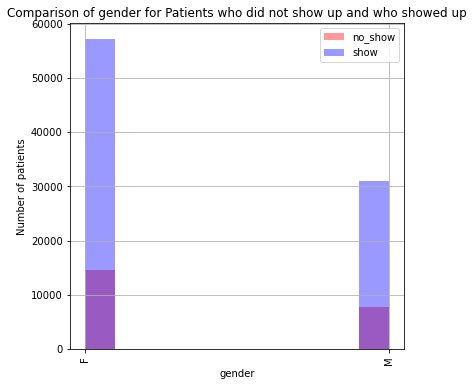

In [175]:
# Comparing the distribution of Gender for Patients who did not show up and those who showed up
# We define and call the function 'appointment'
def appointment(noshow_df,gender,no_show,show):
    
    noshow_df[gender][no_show].hist(figsize=(6,6), color='r',alpha=0.4,label='no_show')
    noshow_df[gender][show].hist(figsize=(6,6), color ='b', alpha=0.4,label='show')
    plt.legend();
    plt.xticks(rotation=90)
    plt.title('Comparison of gender for Patients who did not show up and who showed up');
    plt.xlabel('gender')
    plt.ylabel('Number of patients');
appointment(noshow_df,'gender',no_show,show)

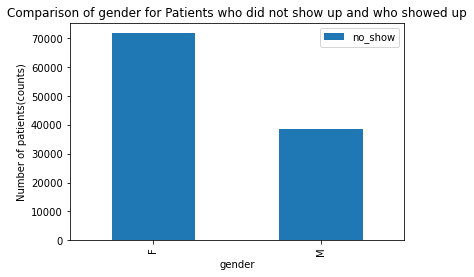

In [187]:
# Visualizing using a bar chart
def appointment(noshow_df,gender,no_show,show):
    
    noshow_df.groupby('gender').no_show.count().plot(kind='bar', title='Comparison of gender for Patients who did not show up and who showed up');
    plt.legend(fontsize=10);
    plt.ylabel('Number of patients(counts)');
appointment(noshow_df,'gender',no_show,show)

Based on my plot, it can be seen that the number of females that showed up is more than that of males that showed up, Similarly, the number of females that did not show up is also more than the number of males that did not show up... this is generally because the sample size(number of scheduled appointments) for the female gender is generally higher than the males implying that, the higher the sample size of the gender, the higher the number of show up or no show up the gender will have...

> **Therefore we cannot conclude that a particular gender is more likely to show up for their appointment.**

### RQ2. Is patient access to Scholarship associated with their no show or show up for their appointment?

To tackle this question, we will run a count on the number of patients that showed up or not grouping them by their access to scholarship or not. We will also compare the distribution between their no show and show up rate using both a histogram and a bar chart for effective visualization and then we will draw our conclusions. In this case, 1 represents access to scholarship and 0 represents no access to scholarship

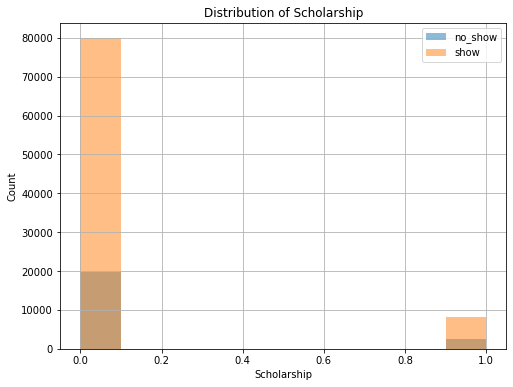

In [144]:
# We can see the distribution for scholarship by comparing it in a histogram 
# We define and call a function 'appointment' to do this
def appointment(noshow_df,scholarship,no_show,show):

    noshow_df[scholarship][no_show].hist(figsize=(8,6),alpha=0.5,label='no_show')
    noshow_df[scholarship][show].hist(figsize=(8,6),alpha=0.5, label='show')
    plt.legend();
    plt.title('Distribution of Scholarship')
    plt.xlabel('Scholarship')
    plt.ylabel('Count');
appointment(noshow_df,'scholarship',no_show,show)

In [75]:
# number of patients that did not have access to scholarship and did not show up
noshow_df.scholarship[no_show].count()


22319

In [105]:
# number of patients that do not have access to scholarship but showed up
noshow_df.scholarship[show].count()

88207

We can see that the about 80% of patients that do not have access to scholarship showed up. This goes to say that access to scholarship does not have a strong association with show up or no show to appointment

We can equally confirm this in a bar chart

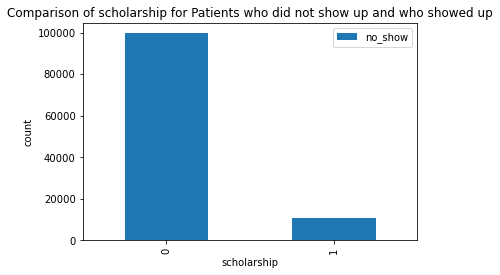

In [188]:
# confirming this using a bar chart
def appointment(noshow_df,scholarship,no_show,show):

    noshow_df.groupby('scholarship').no_show.count().plot(kind='bar',title='Comparison of scholarship for Patients who did not show up and who showed up');
    plt.legend();
    plt.ylabel('count')
appointment(noshow_df,'scholarship',no_show,show)

Based on both plots, 0 represents no access to scholarship and 1 represents access to scholarship. We can see that only about 9% of patients have access to scholarship, the remaining 90.9 % do not have access to scholarship. It seems to me that patients with no access to scholarship are more likely to show up for their appointment.

> **So we can conclude that patients with no access to scholarship are more likely to show up for their medical appointment**

###  RQ3. Is a particular Age group more likely to show up for an appointment than the others?

To tackle this question, We will plot 2 histograms each for no-show and show as influenced by age of patients  We will also compare the distribution between their no show and show up rate using a bar chart for effective visualization and then we will draw our conclusions.

We will also plot 2 histograms each for no-show and show as influenced by age of patients

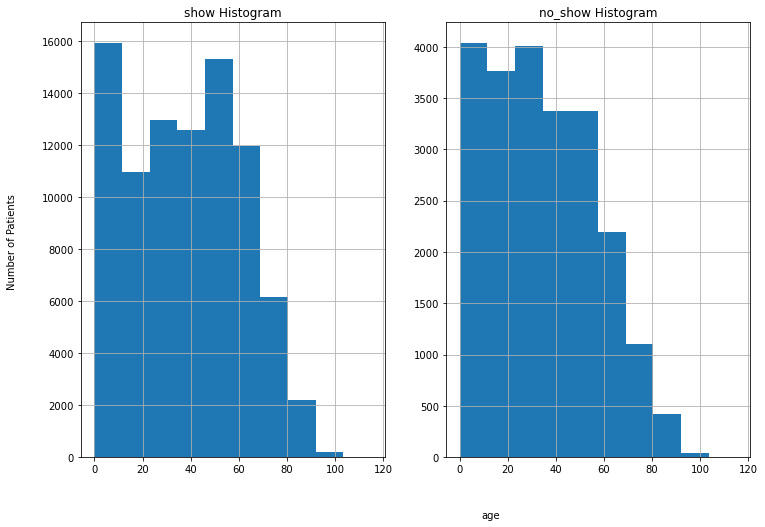

In [158]:
# this plots 2 histograms each for no-show and show as influenced by age of patients
def appointment(noshow_df,age,no_show,show):
    
    fig, axes = plt.subplots(1,2)
    noshow_df.age[noshow_df.no_show == 'Yes'].hist(figsize=(12,8),label='no_show', ax=axes[1])
    noshow_df.age[noshow_df.no_show == 'No'].hist(figsize=(12,8),label='no_show', ax=axes[0])

    axes[1].set_title('no_show Histogram')
    axes[0].set_title('show Histogram');

    fig.text(0.6,0.02,'age', ha='center');
    fig.text(0.04,0.5,'Number of Patients', va='center', rotation='vertical');
appointment(noshow_df,'age',no_show,show)

We can clearly see from these plots that the showed up histogram recorded about 16000 patients as the highest show up count between the ages of 0 and 10 years of age and the next highest is between the ages of 46 aand 58. Patients between the ages of 90 and 115 recorded the lowest show up rate. Similarly,for the no_show histogram, patients between the age group of 0-10 recorded the highest no show rate and age group 22-35 was next.

This further emphasized that the number of patients who showed up are more than those that did not show up. 

This implies that the younger children between ages 0-10 are more likely to show up for their appointments. we will confirm this further in the bar chart below

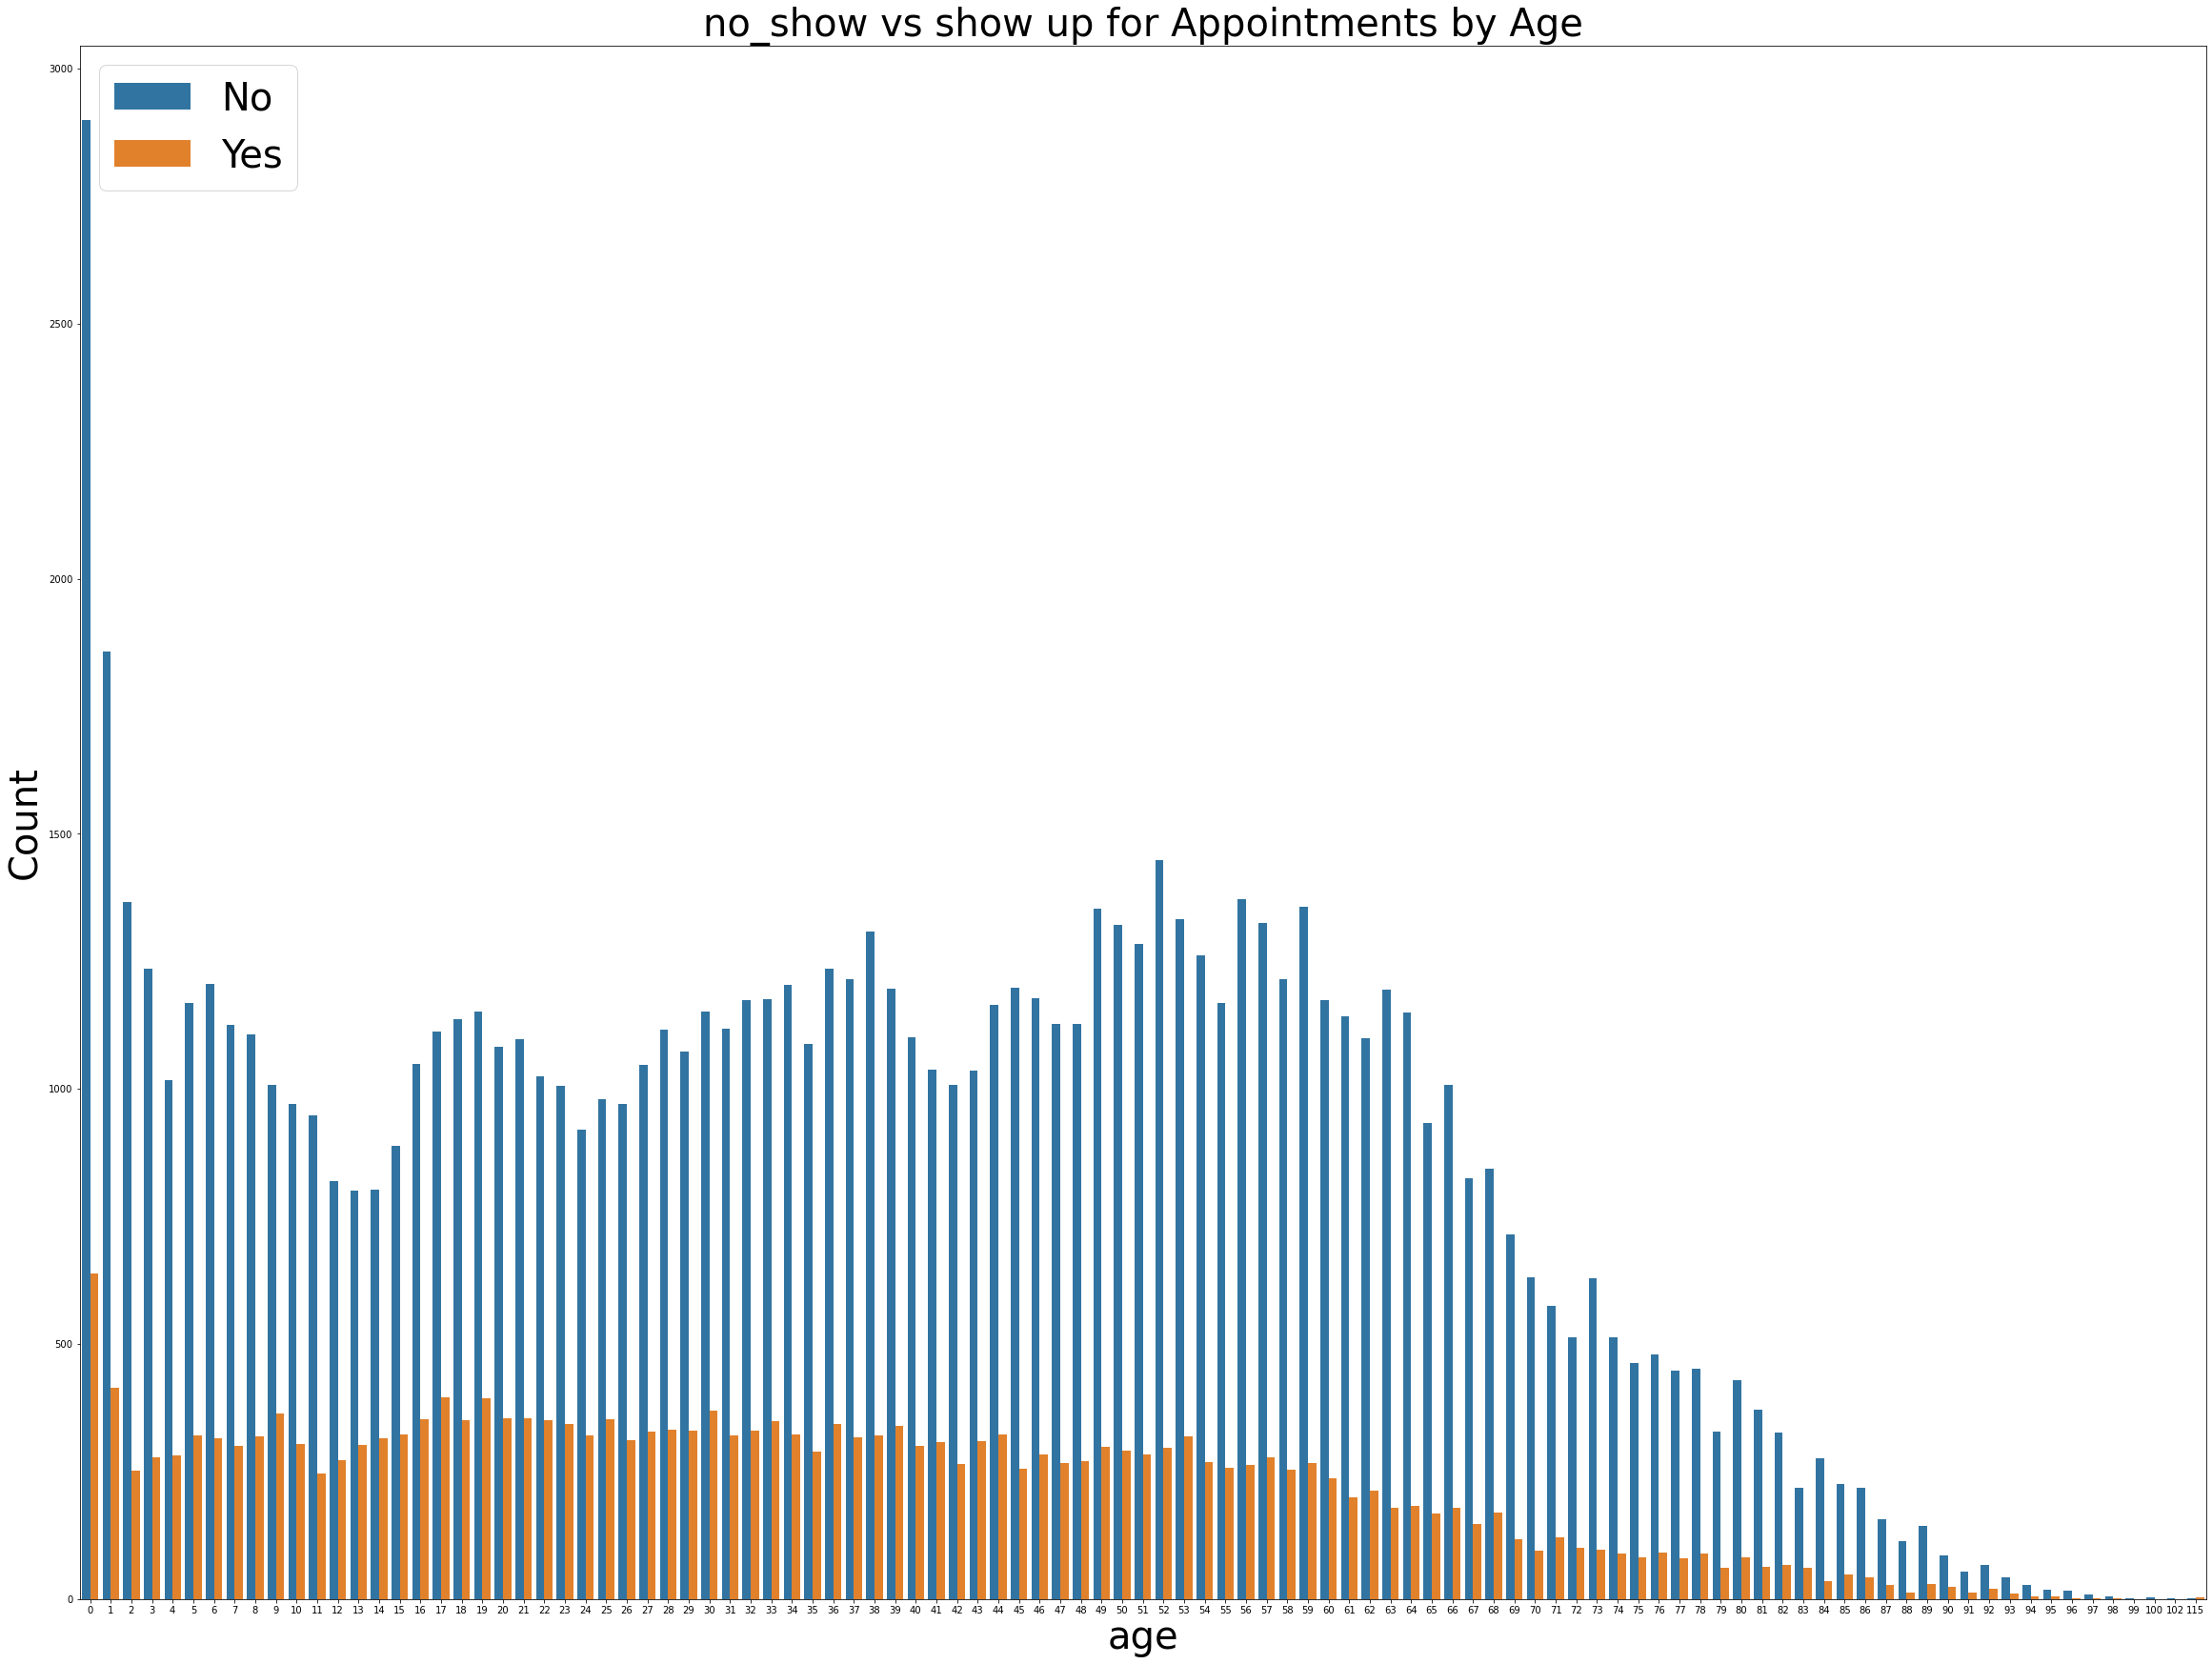

In [173]:
# Exploring further the distribution using a bar chart
def appointment(noshow_df,age,no_show,show):
    
    plt.figure(figsize=(40,30))
    sns.countplot(x=noshow_df.age, hue=noshow_df.no_show)
    plt.legend(fontsize=40);
    plt.title("no_show vs show up for Appointments by Age", fontsize=40)
    plt.xlabel('age', fontsize=40)
    plt.ylabel('Count', fontsize=40)
appointment(noshow_df,'age',no_show,show)

### RQ4. Is there a relationship between the Age and the Scholarship together as determinants of show or no show

To tackle this question, we will inspect how scholarship and age together influence whether a patient shows up or not. We will first run a count to see the relationship between scholarship and the bin_ages. We will then visualize their relationship using a bar chart.
Scholarship seems like it is correlated with Age. We saw previously that younger children are more likely to show up and people with no access to scholarship are more likely to show up for their appointment. So we will plot these 2 variables together to see how the both determine no show rate.

In [37]:
# returns the number of patients that showed up or not as influenced by both scholarship and age combined together
noshow_df.groupby('bin_ages')['scholarship'].value_counts()

bin_ages  scholarship
0 - 10    0              19877
          1               2262
11-25     0              20494
          1               2998
26-40     0              18534
          1               3420
41-59     0              20179
          1               1589
60 - 115  0              20581
          1                592
Name: scholarship, dtype: int64

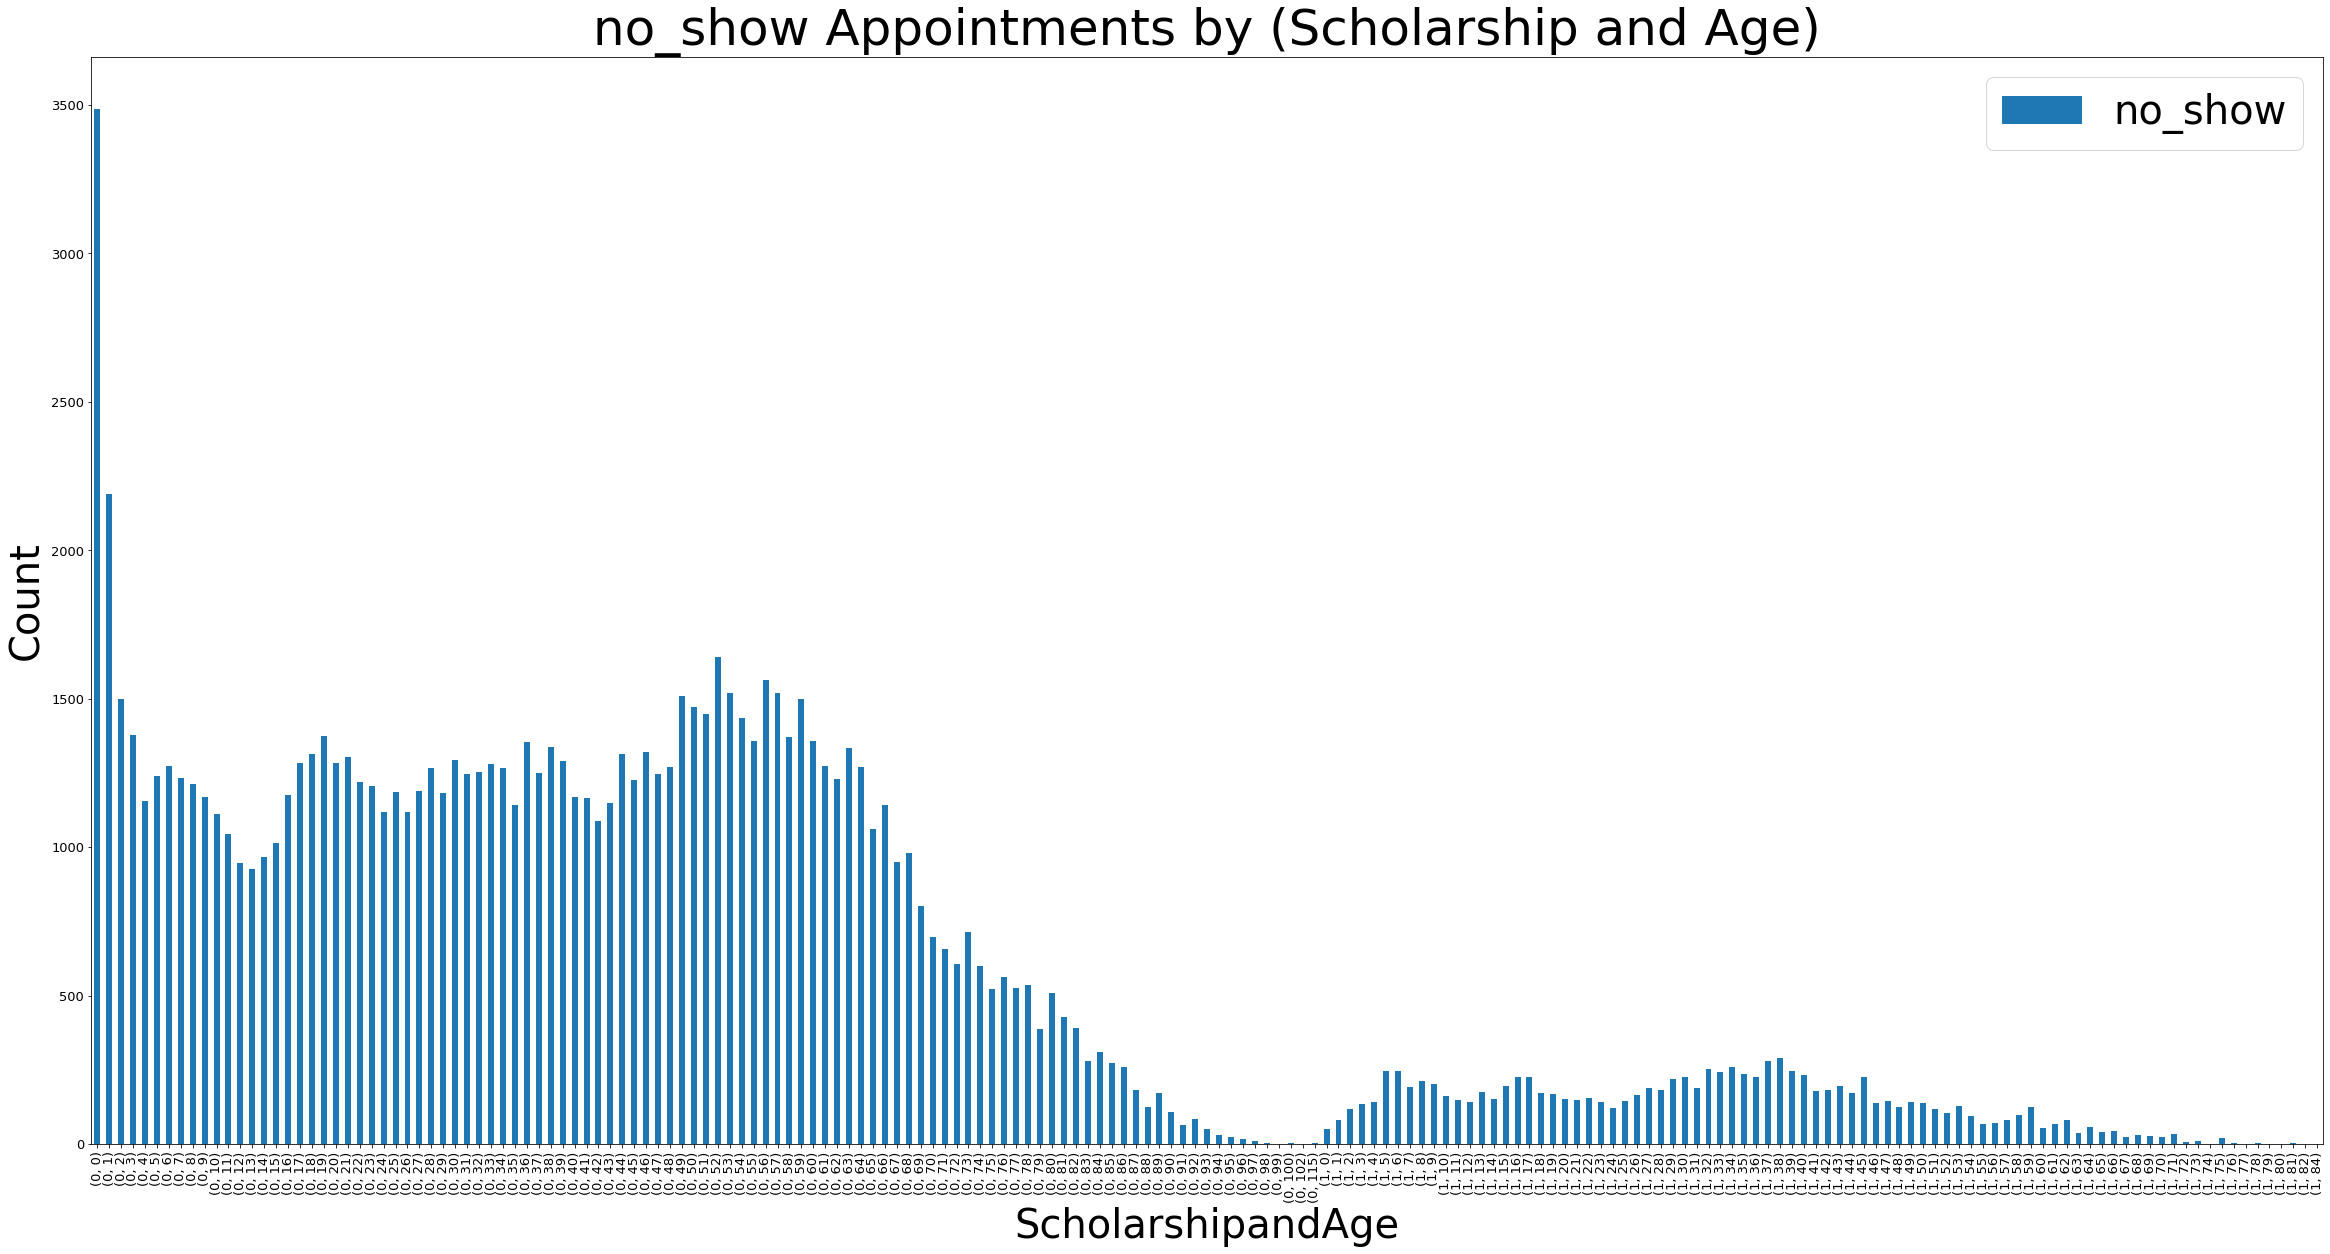

In [172]:
# Inspects how scholarship and age together influence whether patients show up or not
def appointment(noshow_df,ScholarshipandAge,no_show,show):
    
    plt.figure(figsize=[20,4])
    noshow_df.groupby(['scholarship','age']).no_show.count().plot(kind='bar',alpha=1.0,figsize=(40,20), fontsize=13);
    plt.legend(fontsize=40);
    plt.title("no_show Appointments by (Scholarship and Age)", fontsize = 50)
    plt.xlabel('ScholarshipandAge',fontsize=40)
    plt.ylabel('Count',fontsize=40);
appointment(noshow_df,'ScholarshipandAge',no_show,show)


> **Based on our plot for no_show, we can see that the highest depression is for younger children without access to scholarship, so we can conclude there is a relationship between age and scholarship as they together influence whether patients show up for their appointment or not. **

### RQ5. Is there a relationship between Scholarship and Gender as factors influencing show or noshow

To tackle this question, we will inspect how scholarship and gender together influence whether a patient shows up or not. We will first run a count to see the relationship between scholarship and the gender. We will then visualize their relationship using a bar chart.

In [89]:
# Inspects how Scholarship and Gender together influence whether patients show up or not
noshow_df.groupby('gender')['scholarship'].value_counts()

gender  scholarship
F       0              62986
        1               8853
M       0              36679
        1               2008
Name: scholarship, dtype: int64

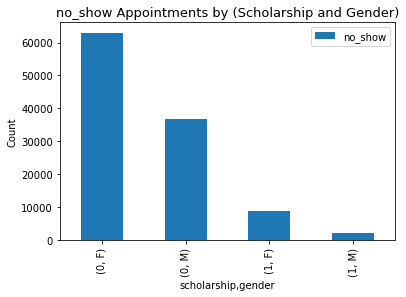

In [159]:
def appointment(noshow_df,ScholarshipandGender,no_show,show):
    
    noshow_df.groupby(['scholarship','gender']).no_show.count().plot(kind='bar');
    plt.ylabel('Count')
    plt.title("no_show Appointments by (Scholarship and Gender)", fontsize = 13)
    plt.legend();
appointment(noshow_df,'ScholarshipandGender',no_show,show)

> Based on our plot of scholarship and gender together, we deduce the likelihood of the following groups of people in showing up for their appointment in ascending order
Female Patients with no Scholarship
Male Patients with no scholarship
Female Patients with Scholarship
Male Patients with Scholarship

> **We can conclude that there is a relationship between scholarship and gender and Male Patients with Scholarship have the highest likelihood of showing up for their appointment**

<a id='conclusions'></a>
## Conclusions

> This project performed a data analysis on dataset collected for 100k medical appointments in Brazil and it focused on finding out what factors influenced whether patients showed up for their medical appointments or not. The collected data sets was inspected and went through the data wrangling process of cleaning to ensure i have a cleaned quality data to work with

> This dataset was explored using 4 variables for the analysis. 3 independent variables and 1 dependent variables. The Dependent Variable is no_show. The Independent variables used are gender, scholarship and age. 

> **Five(5) Research questions/hypothesis were also asked/posed in the course of exploring the data.**

> RQ1. Is a particular gender more likely to show up for their appointment than the other?

> RQ2. Is patient access to Scholarship associated with their no show or show up for their appointment

> RQ3. Is a particular Age group more likely to show up for an appointment than the others?

> RQ4. Is there a relationship between the Age and the Scholarship of patients as determinants of show or no show?

> RQ5. Is there a relationship between Scholarship and Gender as factors influencing show or no show?

> **Based on the research questions, the following results/findings were made-**

> RQ1. We cannot conclude that a particular gender is more likely to show up for their appointment as there is no significant correlation between gender and whether the patient showed up or not. 

> RQ2. Yes, Access to Scholarship reduces the likelihood of a patient showing up for their appointment. We have seen that those with access to scholarship are less likely to show up for their appointment

> RQ3. Yes, A particular age group influences whether a patient shows up or not. Childen(0-10years) are more likely to show up for their appointment

> RQ4.Yes, there is a strong correlation between age and scholarship in determining show or no show. Younger children(0-10years) who do not have access to scholarship are more likely to show up for their appointment

> RQ5. Yes, there is a relationship between scholarship and gender which influences show or no show. Male Patients with Scholarship have the highest likelihood of showing up for their appointment

>We can generally conclude that the most important factors affecting whether a patient will show up for their medical appointment are Age and Scholarship.

> **Limitations**

> The basic describe code could not return descriptive statistics for all columns together because of their datatypes. Apparently, it returns only descriptive statistics for numeric data type. To view for the columns of type string, i had to run a more specific describe function  





